# 🐚🐧 Penguin and Abalone Classifier 🐧🐚
Using different machine learning algorithms and different data sets, this notebook attempts to predict the species of a penguin given its features and the sex of an abalone given its features.

## Environment Setup

Before running this notebook, make sure to run the following command to install all of the required libraries needed to execute the code properly.

`pip install -r requirements.txt --user`

**NOTE:** However, if you installed your Python installation globally, e.g. inside C:\Program Files\Python311 (and not in C:\User\%Appdata\Python311), remove the ***--user*** argument.

## Imports and Declarations

In [13]:
# data analysis and manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# model
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.neural_network import MLPClassifier as MLP

# data postprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# score tracking
accuracy_scores = []
macro_f1_scores = []
weighted_f1_scores = []


## Dataset

In [14]:
# read data from file
penguin = pd.read_csv('penguins.csv')
abalone = pd.read_csv('abalone.csv')

## Preprocessing - Penguin and Abalone Dataset

In [15]:
label_encoder = LabelEncoder()
penguin_encoded = penguin.apply(label_encoder.fit_transform)
print ("Raw Penguin Data")
print (penguin_encoded.head())
print ()
label_encoder = LabelEncoder()
abalone_encoded = abalone.apply(label_encoder.fit_transform)
print ("Raw Abalone Data")
print (abalone_encoded.head())

Raw Penguin Data
   species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       2                41               56                  5   
1        0       2                44               43                 10   
2        0       2                50               49                 19   
3        0       2                21               62                 17   
4        0       2                43               73                 14   

   body_mass_g  sex  
0           30    1  
1           32    0  
2           11    0  
3           18    0  
4           26    1  

Raw Abalone Data
   Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0     0            96        77      32         1730           1143   
1     2            85        68      29         1195            777   
2     2            67        52      21          630            437   
3     0           105        78      32         1994           1089   
4     2            90

## Preprocessing - One Hot Encoding

In [16]:
penguin_hot_encoder = OneHotEncoder()
penguin_hot_encoder.fit(penguin_encoded)
penguin_hot_labels = penguin_hot_encoder.transform(penguin_encoded).toarray()
print ("Penguin data set shape: ", penguin_encoded.shape)
print ("Penguin hot labels shape: ", penguin_hot_labels.shape)
print ()

abalone_hot_encoder = OneHotEncoder()
abalone_hot_encoder.fit(abalone_encoded)
abalone_hot_labels = abalone_hot_encoder.transform(abalone_encoded).toarray()
print ("Abalone data set shape: ", abalone_encoded.shape)
print ("Abalone hot labels shape: ", abalone_hot_labels.shape)

Penguin data set shape:  (333, 7)
Penguin hot labels shape:  (333, 397)

Abalone data set shape:  (4177, 9)
Abalone hot labels shape:  (4177, 6077)


## Preprocessing - Double Check for Missing Values

In [17]:
print('Penguin data set - column with missing value:')
print(penguin.isna().sum())
print()
print('Abalone data set - column with missing value:')
print(abalone.isna().sum())

Penguin data set - column with missing value:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Abalone data set - column with missing value:
Type             0
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64


## Charting

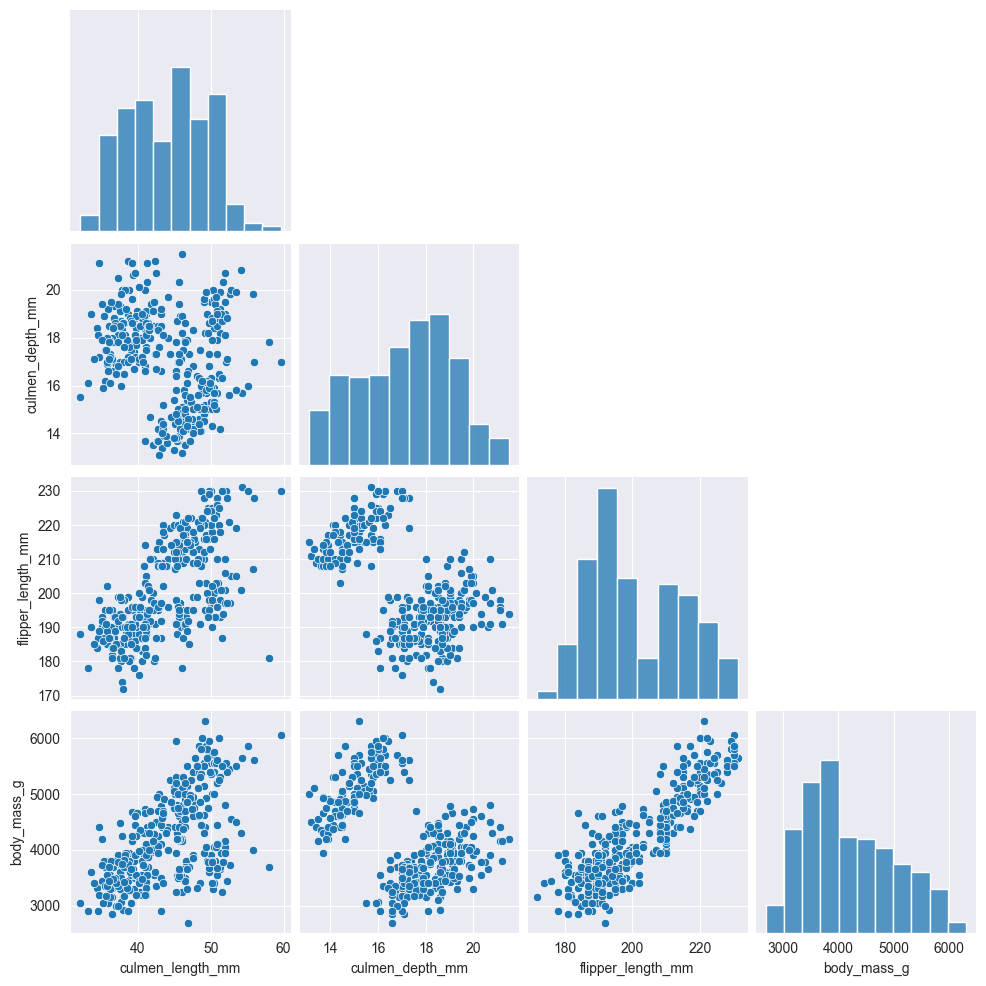

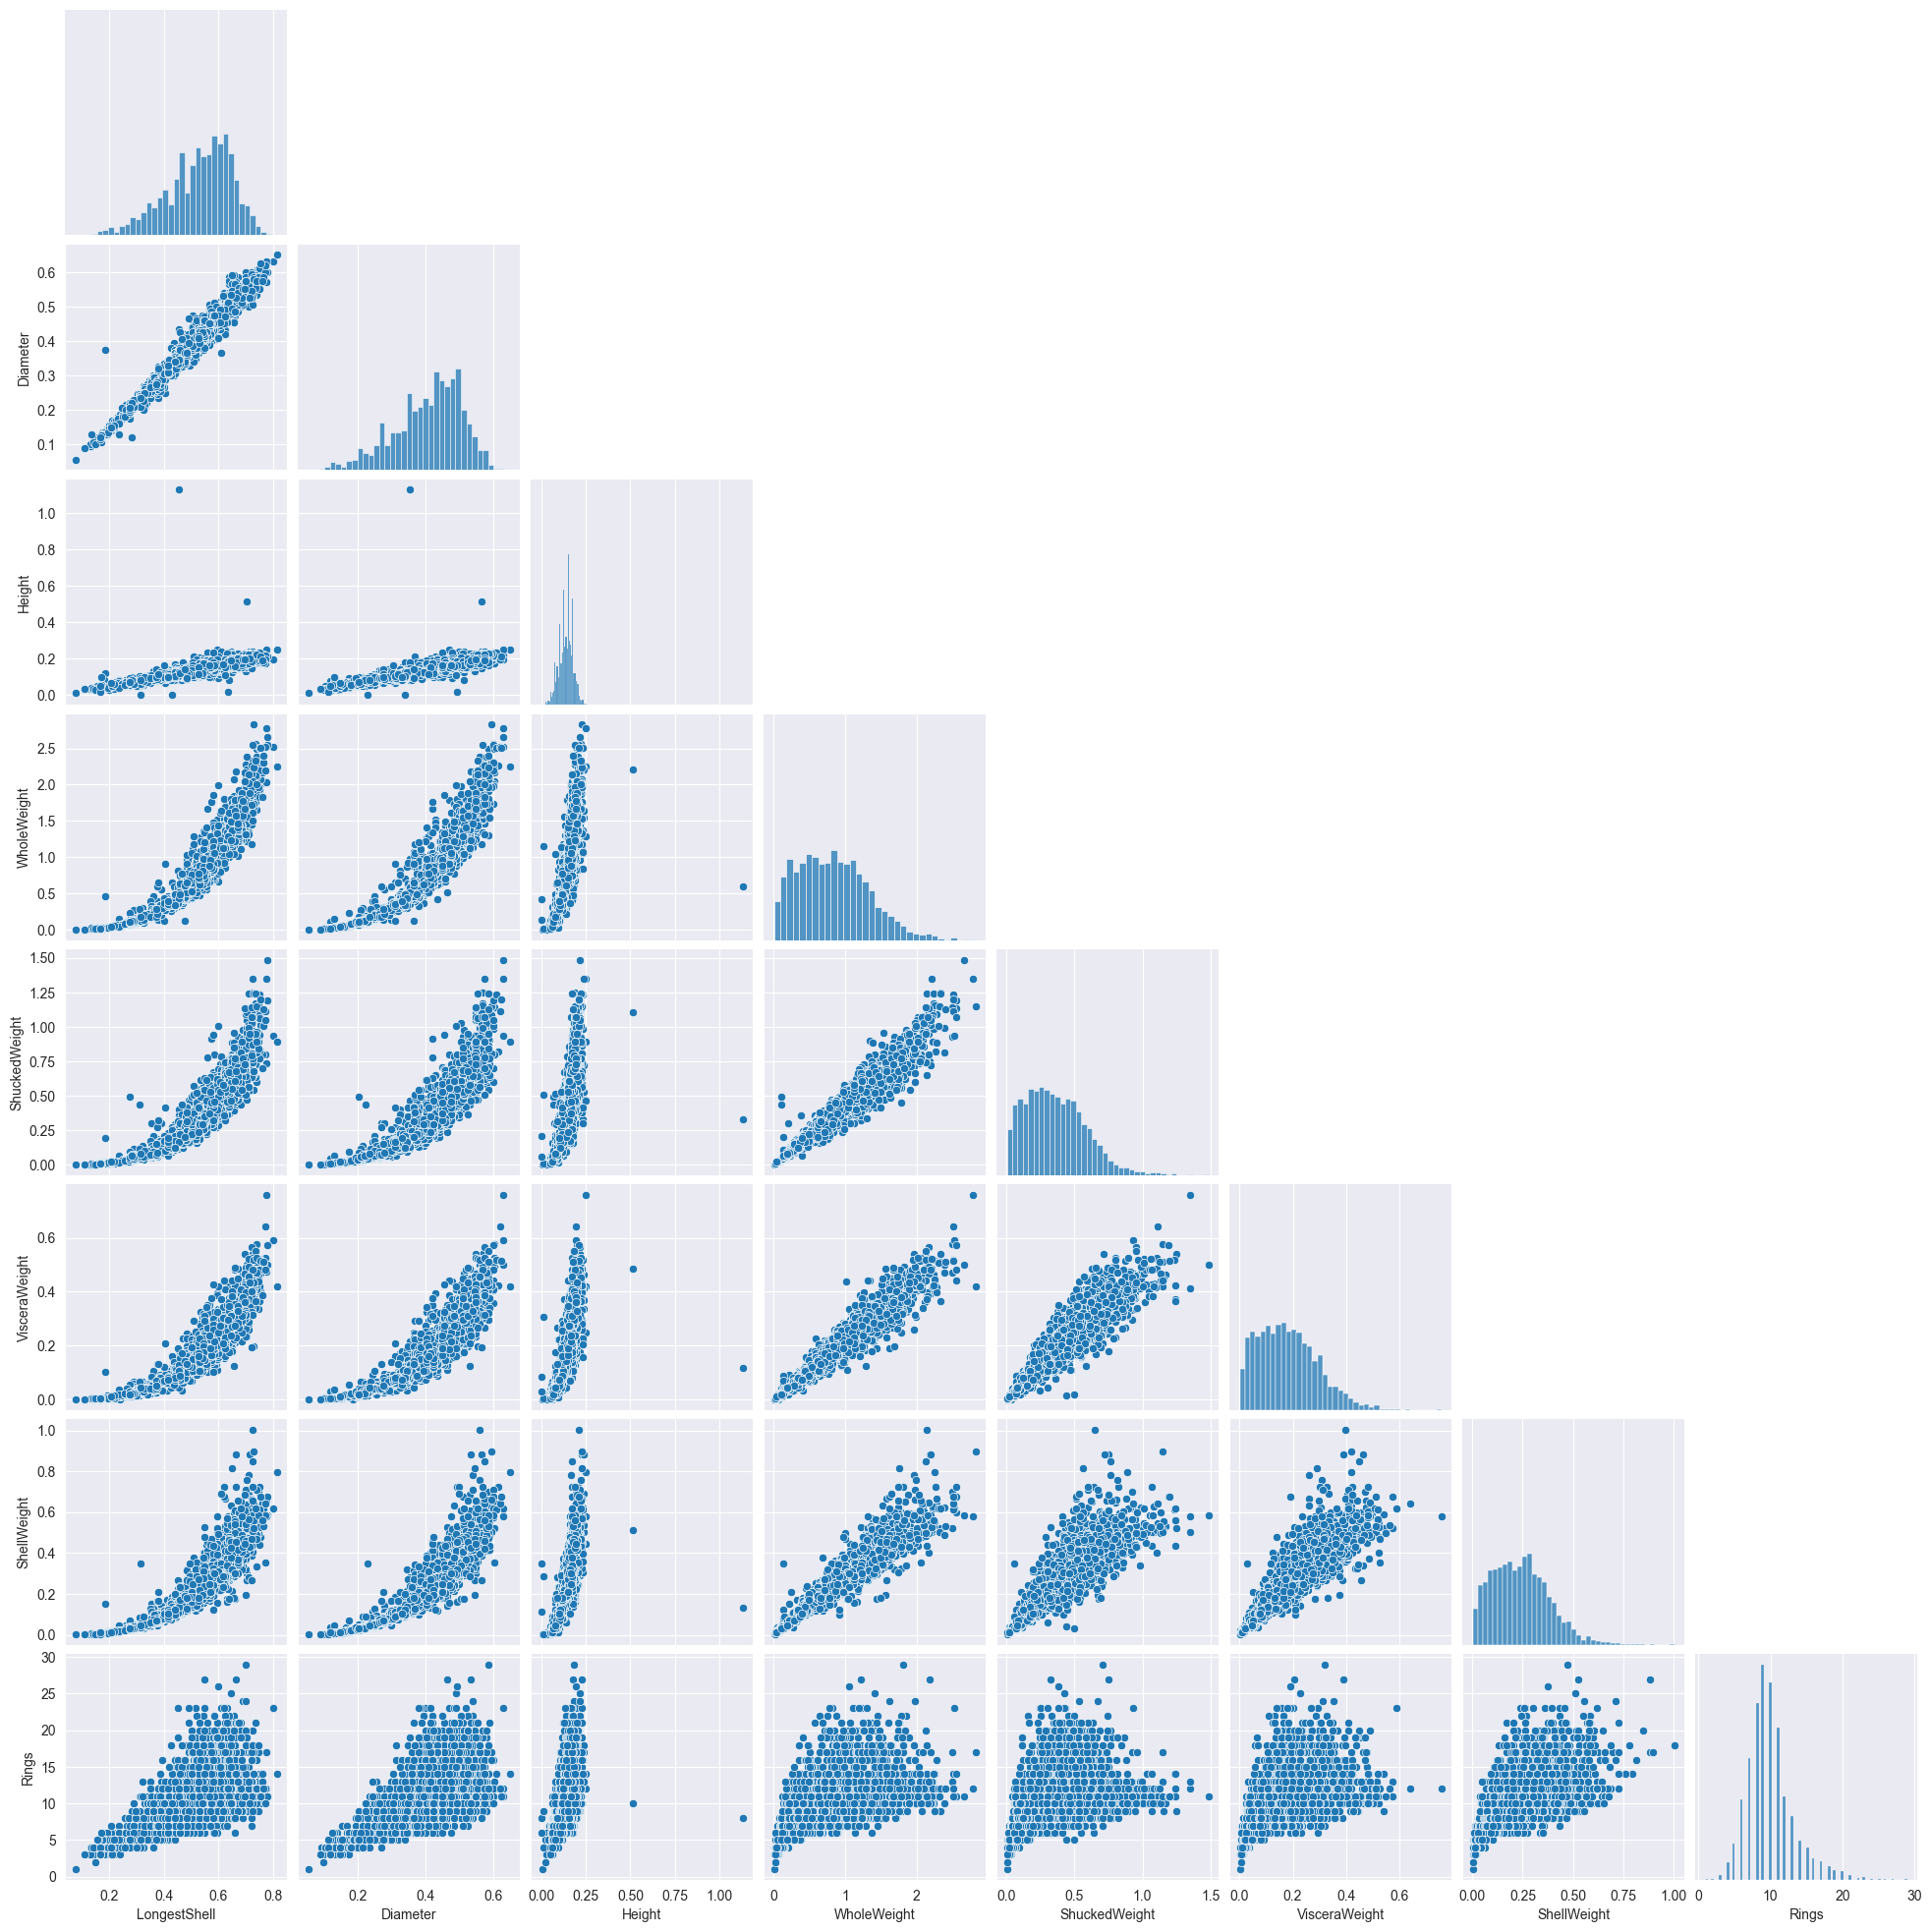

In [18]:
# Exploratopry Data Analysis
sns.pairplot(penguin, corner=True)
plt.savefig('penguin_pairplot.png')

sns.pairplot(abalone, corner=True)
plt.savefig('abalone_pairplot.png')

## Data Splitting

In [19]:
# split data into training (80%) and testing (20%) sets with random state 0
penguinXtrain, penguinXtest, penguinYtrain, penguinYtest = train_test_split(penguin_encoded, penguin_hot_labels, test_size=0.2, random_state=0)
print ("Penguin total X train: ", len(penguinXtrain))
print ("Penguin total X test: ", len(penguinXtest))
print ("Penguin total Y train: ", len(penguinYtrain))
print ("Penguin total Y test: ", len(penguinYtest))
print()
abaloneXtrain, abaloneXtest, abaloneYtrain, abaloneYtest = train_test_split(abalone_encoded, abalone_hot_labels, test_size=0.2, random_state=0)
print ("Abalone total X train: ", len(abaloneXtrain))
print ("Abalone total X test: ", len(abaloneXtest))
print ("Abalone total Y train: ", len(abaloneYtrain))
print ("Abalone total Y test: ", len(abaloneYtest))

Penguin total X train:  266
Penguin total X test:  67
Penguin total Y train:  266
Penguin total Y test:  67

Abalone total X train:  3341
Abalone total X test:  836
Abalone total Y train:  3341
Abalone total Y test:  836


## Base Decision Tree

In [20]:
# INSERT CODE HERE

## Top Decision Tree

In [21]:
# INSERT CODE HERE

## Base MLP

In [22]:
# INSERT CODE HERE

## Top MLP

In [23]:
# INSERT CODE HERE

## Output Statistics

In [24]:
# to run this cell, delete the % symbol
%
with open('penguin-performance.txt', 'w') as f:
    # Base-DT Metrics
    f.write('---===Base-DT (Insert hyperparameter here)===---\n')
    penguin_base_confusion_matrix = np.array2string(confusion_matrix(penguinYtrue, penguinYpredicted))
    f.write('---Section 4b---\n')
    f.write('Base-DT Confusion Matrix:\n')
    f.write(penguin_base_confusion_matrix)
    f.write('\n')

    # calculate precision, recall, and F1-measure for each class
    penguin_classification_report = classification_report(penguinYtrue, penguinYpredicted)
    f.write('---Section 4c---\n')
    f.write('Classification Report:\n')
    f.write(penguin_classification_report)
    f.write('\n')
    
    # calculate accuracy, macro-average F1, and weighted-average F1
    accuracy = accuracy_score(penguinYtrue, penguinYpredicted)
    macro_f1 = f1_score(penguinYtrue, penguinYpredicted, average='macro')
    weighted_f1 = f1_score(penguinYtrue, penguinYpredicted, average='weighted')
    f.write('---Section 4d---\n')
    print(f"Accuracy: {accuracy}\n")
    print(f"Macro-average F1: {macro_f1}\n")
    print(f"Weighted-average F1: {weighted_f1}\n")

    # calculate average accuracy and variance
    accuracy_mean = np.mean(accuracy_scores)
    accuracy_var = np.var(accuracy_scores)
    f.write('---Section 5a---\n')
    f.write(f"Average accuracy: {accuracy_mean}\n")
    f.write(f"Accuracy variance: {accuracy_var}\n")

    # calculate average macro-average F1 and variance
    macro_f1_mean = np.mean(macro_f1_scores)
    macro_f1_var = np.var(macro_f1_scores)
    f.write('---Section 5b---\n')
    f.write(f"Average macro-average F1: {macro_f1_mean}\n")
    f.write(f"Macro-average F1 variance: {macro_f1_var}\n")

    # calculate average weighted-average F1 and variance
    weighted_f1_mean = np.mean(weighted_f1_scores)
    weighted_f1_var = np.var(weighted_f1_scores)
    f.write('---Section 5c---\n')
    f.write(f"Average weighted-average F1: {weighted_f1_mean}\n")
    f.write(f"Weighted-average F1 variance: {weighted_f1_var}\n")

    # Top-DT Metrics
    f.write('---===Top-DT (Insert hyperparameter here)===---\n')
    penguin_top_confusion_matrix = np.array2string(confusion_matrix(penguinYtrue, penguinYpredicted))
    f.write('---Section 4b---\n')
    f.write('Top-DT Confusion Matrix:\n')
    f.write(penguin_top_confusion_matrix)
    
    # calculate precision, recall, and F1-measure for each class
    penguin_classification_report = classification_report(penguinYtrue, penguinYpredicted)
    f.write('---Section 4c---\n')
    f.write('Classification Report:\n')
    f.write(penguin_classification_report)
    f.write('\n')
    
    # calculate accuracy, macro-average F1, and weighted-average F1
    accuracy = accuracy_score(penguinYtrue, penguinYpredicted)
    macro_f1 = f1_score(penguinYtrue, penguinYpredicted, average='macro')
    weighted_f1 = f1_score(penguinYtrue, penguinYpredicted, average='weighted')
    f.write('---Section 4d---\n')
    print(f"Accuracy: {accuracy}\n")
    print(f"Macro-average F1: {macro_f1}\n")
    print(f"Weighted-average F1: {weighted_f1}\n")

    # calculate average accuracy and variance
    accuracy_mean = np.mean(accuracy_scores)
    accuracy_var = np.var(accuracy_scores)
    f.write('---Section 5a---\n')
    f.write(f"Average accuracy: {accuracy_mean}\n")
    f.write(f"Accuracy variance: {accuracy_var}\n")

    # calculate average macro-average F1 and variance
    macro_f1_mean = np.mean(macro_f1_scores)
    macro_f1_var = np.var(macro_f1_scores)
    f.write('---Section 5b---\n')
    f.write(f"Average macro-average F1: {macro_f1_mean}\n")
    f.write(f"Macro-average F1 variance: {macro_f1_var}\n")

    # calculate average weighted-average F1 and variance
    weighted_f1_mean = np.mean(weighted_f1_scores)
    weighted_f1_var = np.var(weighted_f1_scores)
    f.write('---Section 5c---\n')
    f.write(f"Average weighted-average F1: {weighted_f1_mean}\n")
    f.write(f"Weighted-average F1 variance: {weighted_f1_var}\n")

with open('abalone-performance.txt', 'w') as f:
    # Base-MLP Metrics
    f.write('---===Base-MLP (Insert hyperparameter here)===---\n')
    abalone_base_confusion_matrix = np.array2string(confusion_matrix(abaloneYtrue, abaloneYpredicted))
    f.write('---Section 4b---\n')
    f.write('Base-MLP Confusion Matrix:\n')
    f.write(abalone_base_confusion_matrix)
    f.write('\n')

    # calculate precision, recall, and F1-measure for each class
    abalone_classification_report = classification_report(abaloneYtrue, abaloneYpredicted)
    f.write('---Section 4c---\n')
    f.write('Classification Report:\n')
    f.write(abalone_classification_report)
    f.write('\n')
    
    # calculate accuracy, macro-average F1, and weighted-average F1
    accuracy = accuracy_score(abaloneYtrue, abaloneYpredicted)
    macro_f1 = f1_score(abaloneYtrue, abaloneYpredicted, average='macro')
    weighted_f1 = f1_score(abaloneYtrue, abaloneYpredicted, average='weighted')
    f.write('---Section 4d---\n')
    print(f"Accuracy: {accuracy}\n")
    print(f"Macro-average F1: {macro_f1}\n")
    print(f"Weighted-average F1: {weighted_f1}\n")

    # calculate average accuracy and variance
    accuracy_mean = np.mean(accuracy_scores)
    accuracy_var = np.var(accuracy_scores)
    f.write('---Section 5a---\n')
    f.write(f"Average accuracy: {accuracy_mean}\n")
    f.write(f"Accuracy variance: {accuracy_var}\n")

    # calculate average macro-average F1 and variance
    macro_f1_mean = np.mean(macro_f1_scores)
    macro_f1_var = np.var(macro_f1_scores)
    f.write('---Section 5b---\n')
    f.write(f"Average macro-average F1: {macro_f1_mean}\n")
    f.write(f"Macro-average F1 variance: {macro_f1_var}\n")

    # calculate average weighted-average F1 and variance
    weighted_f1_mean = np.mean(weighted_f1_scores)
    weighted_f1_var = np.var(weighted_f1_scores)
    f.write('---Section 5c---\n')
    f.write(f"Average weighted-average F1: {weighted_f1_mean}\n")
    f.write(f"Weighted-average F1 variance: {weighted_f1_var}\n")

    # Top-MLP Metrics
    f.write('---===Top-MLP (Insert hyperparameter here)===---\n')
    abalone_top_confusion_matrix = np.array2string(confusion_matrix(abaloneYtrue, abaloneYpredicted))
    f.write('---Section 4b---\n')
    f.write('Top-MLP Confusion Matrix:\n')
    f.write(abalone_top_confusion_matrix)

        # calculate precision, recall, and F1-measure for each class
    abalone_classification_report = classification_report(abaloneYtrue, abaloneYpredicted)
    f.write('---Section 4c---\n')
    f.write('Classification Report:\n')
    f.write(abalone_classification_report)
    f.write('\n')
    
    # calculate accuracy, macro-average F1, and weighted-average F1
    accuracy = accuracy_score(abaloneYtrue, abaloneYpredicted)
    macro_f1 = f1_score(abaloneYtrue, abaloneYpredicted, average='macro')
    weighted_f1 = f1_score(abaloneYtrue, abaloneYpredicted, average='weighted')
    f.write('---Section 4d---\n')
    print(f"Accuracy: {accuracy}\n")
    print(f"Macro-average F1: {macro_f1}\n")
    print(f"Weighted-average F1: {weighted_f1}\n")

    # calculate average accuracy and variance
    accuracy_mean = np.mean(accuracy_scores)
    accuracy_var = np.var(accuracy_scores)
    f.write('---Section 5a---\n')
    f.write(f"Average accuracy: {accuracy_mean}\n")
    f.write(f"Accuracy variance: {accuracy_var}\n")

    # calculate average macro-average F1 and variance
    macro_f1_mean = np.mean(macro_f1_scores)
    macro_f1_var = np.var(macro_f1_scores)
    f.write('---Section 5b---\n')
    f.write(f"Average macro-average F1: {macro_f1_mean}\n")
    f.write(f"Macro-average F1 variance: {macro_f1_var}\n")

    # calculate average weighted-average F1 and variance
    weighted_f1_mean = np.mean(weighted_f1_scores)
    weighted_f1_var = np.var(weighted_f1_scores)
    f.write('---Section 5c---\n')
    f.write(f"Average weighted-average F1: {weighted_f1_mean}\n")
    f.write(f"Weighted-average F1 variance: {weighted_f1_var}\n")

UsageError: Line magic function `%` not found.
